# 1. PCA

### 1-1. 다음 보기들을 PCA의 수행과정에 맞게 나열하시오.

a. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.

b. 입력 데이터 세트의 공분산 행렬을 생성한다.

c. 고유값이 가장 큰 순으로 K개(PCA의 변환 차수)만큼 고유벡터를 추출한다.

d. 공분산 행렬의 고유벡터와 고유값을 계산한다.


정답: b-d-c-a

### 1-2. 다음 문장의 빈 칸에 들어갈 말을 쓰시오.

PCA는 다차원 데이터셋의 문제점 중 하나인 입력 변수 간의 상관관계가 높을 경우 모델의 예측 성능이 떨어지는 ____ 문제를 효과적으로 해결할 수 있는 방법론이다.

정답: 다중공선성

### 1-3. PCA 과정 중 세번째 축을 찾는 방법에 대해 서술하시오.

정답:첫 번째 축과 두 번째 축에 직교하고 분산을 최대한 보존하는 축을 찾는다.

### 1-4. PCA 코드

아래코드를 실행시켜주세요.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target

(1) PCA를 적용하기 전, 개별 속성값이 동일한 스케일을 가지도록 standardscaler를 사용해 스케일링하세요.

In [2]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

(2) PCA 클래스를 사용하여, 2차원을 가지는 데이터로 변환해주세요.

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

In [4]:
print(iris_pca.shape)  # 이 값이 (150,2)가 나와야합니다.

(150, 2)


(3) 아래 그림은 원본데이터의 시각화 결과입니다. PCA로 변환한 데이터를 시각화하여 이와 비교해주세요.

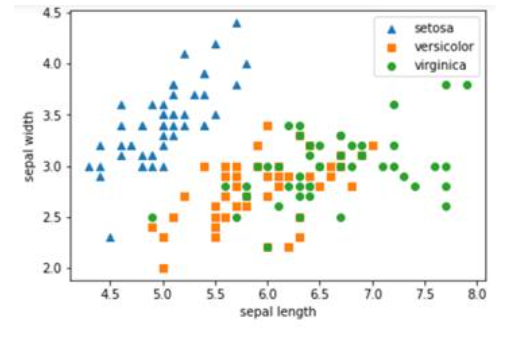

In [7]:
#먼저 데이터프레임으로 변환해주었습니다.
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target

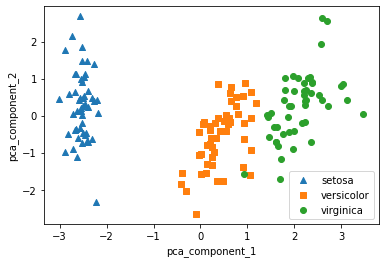

In [6]:
#코드

markers=['^', 's', 'o']
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

(4) PCA 컴포넌트 별로 변동성을 얼마나 차지하는 지 그 비율을 계산해주세요.

In [8]:
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


# 2. LDA

### 2-1. LDA와 PCA의 차이점을 설명하시오.(축을 찾는 과정의 관점에서)

정답: PCA는 입력 데이터의 변동성이 가장 큰 축을 찾고 LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.

### 2-2. 빈칸에 들어갈 말을 쓰시오.
LDA는 차원을 축소할 때 클래스 내부의 분산은 최대한 __게 가져가고 클래스 간 분산은 최대한 __게 가져간다.

정답: 작, 크

### 2-3. 다음의 보기들을 LDA 수행과정에 맞게 나열하시오.
a. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출합니다.

b. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환합니다.

c. 클래스 내부와 클래스 간 분산 행렬을 구합니다. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터를 기반으로 구합니다.

d. 클래스 내부 분산 행렬과 클래스 간 분산 행렬의 곱을 고유벡터로 분해하는 과정을 거친다.

정답: c,d,a,b

### 2-4. LDA 코드

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

In [9]:
################ 코드를 실행해주세요 ########################

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()      # 붓꽃 데이터 세트 로드
iris_scaled = StandardScaler().fit_transform(iris.data)     # 표준 정규 분포로 스케일링

**1)** iris_scaled의 shape을 확인하여 차원을 축소하기 전 feature의 개수를 확인해주세요.

In [10]:
iris_scaled.shape

(150, 4)

**2)** 아래 코드의 빈칸을 채워서 LDA 차원축소를 시행해주세요. 

In [13]:
# sklearn LinearDiscriminantAnalysis 이용하여 lda 객체 생성, 컴포넌트의 개수는 2개로 설정
lda = LinearDiscriminantAnalysis(n_components=2)

# LDA는 지도학습이기 때문에 클래스의 결정값이 필요합니다
# lda의 fit_transform method로 iris_scaled 데이터의 차원 축소
iris_lda = lda.fit_transform(iris_scaled, iris.target)


**3)** iris_lda의 shape을 확인하여 1번에서 확인한 shape과 비교해주세요.

In [14]:
iris_lda.shape

(150, 2)

**4)** 각 컴포넌트 별 explained variance를 구하여 2개의 컴포넌트로 기존 feature들을 몇 % 설명해낼 수 있는지 확인해주세요.

In [15]:
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [17]:
lda.explained_variance_ratio_[0] + lda.explained_variance_ratio_[1]

0.9999999999999999

**5)** LDA 변환된 입력 데이터 값을 2차원 평면에 나타내어 품종별로 표현해주세요. 

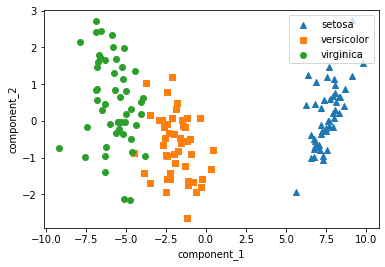

In [18]:
# df 데이터프레임에 LDA 변환된 입력 데이터와 타깃 클래스 (품종) column을 만들어주세요
df = pd.DataFrame(iris_lda,columns=['component_1', 'component_2'])
df['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    # df의 component_1값들을 x축에
    x = df[df['target']==i]['component_1']

    # df의 component_2값들을 y축에
    y = df[df['target']==i]['component_2']

    # x축에 component_1, y축에 component_2, marker,label은 위에서 정해준 대로 scatter plot 만들기
    plt.scatter(x,y,marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.show()

# 3.SVD(Singular Value Decomposition)

3-1) SVD 는 PCA 와 유사한 행렬 분해 기법을 이용합니다. 하지만 PCA와의 차이점이 있습니다. SVD와 PCA 차이점을 쓰시오.

답 ) PCA의 경우 정방행렬만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다.

3-2 ) SVD와 관련된 설명중에 옳은 것을 모두 고르시오.


1.   SVD는 특이 값 분해로 불리며 일반적으로 mxn 크기의 행렬 A를  A=UΣVT 로 분리한다.

2.   SVD는 특이값 분해로 불리며 행렬 U,V 에 속한 벡터는 특이벡터이며, Σ는 대각행렬이며, 대각에 위치한 값만 0이고, 나머지 위치의 값은 모두 0 이 아니다.

3. 넘파이의 SVD 모듈을 사용하면 Σ행렬의 경우 1차원의 행렬로 표현된다.

4. Trucated SVD는 Σ에 있는 대각 원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식이다.

5. Trucated SVD는 SVD 처럼 원본 행렬로 정확하게 원복 할 수 있다.



답 ) 1,3,4

3-3) 넘파이의 SVD 의 모듈을 활용하여 행렬의 개별 로우가 의존성이 있을 때와 없을 때 원본 행렬로 정확히 복원되는지 확인하는 코드입니다.

아래 코드의 빈칸을 채우고 실행해주세요.

In [ ]:
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print("개별 로우의 의존성이 없는 행렬")
print(np.round(a, 3))


U, Sigma, Vt =  svd(a)

print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

print("분해된 U,Sigma, Vt를 이용해 다시 복원했을 때")
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

개별 로우의 의존성이 없는 행렬
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]
분해된 U,Sigma, Vt를 이용해 다시 복원했을 때
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [ ]:
a[2] = a[0] + a[1]
a[3] = a[0]
print("개별 로우의 의존성이 있는  행렬")
print(np.round(a,3))
U, Sigma, Vt = svd(a)

print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
print("분해된 U,Sigma, Vt를 이용해 다시 복원했을 때")
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

개별 로우의 의존성이 있는  행렬
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]
U matrix:
 [[ 0.246  0.583  0.76  -0.15 ]
 [-0.774 -0.017  0.365  0.516]
 [-0.529  0.566 -0.365 -0.516]
 [ 0.246  0.583 -0.395  0.666]]
Sigma Value:
 [2.663 0.807 0.    0.   ]
V transpose matrix:
 [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]
 [-0.389 -0.784  0.479  0.07 ]
 [-0.6    0.13  -0.376  0.694]]
(4, 2) (2, 2) (2, 4)
분해된 U,Sigma, Vt를 이용해 다시 복원했을 때
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


3-4) Truncated SVD 를 이용한 행렬 분해를 하는 코드입니다.

행렬의 특이값을 3으로 하여 아래 코드의 빈칸을 채우고 실행하고 아래의 질문에 답해주세요.

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)

# Truncated SVD로 Sigma 행렬의 특이값을 3로 하여 Truncated SVD 수행.
num_components = 3
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

Truncated SVD 분해 행렬 차원: (6, 3) (3,) (3, 6)

Truncated SVD Sigma값 행렬: [0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.11999599 0.26913771 0.06008733 0.2693897  0.79366377 0.38445735]
 [0.5600499  0.64313553 0.49914549 0.79339898 1.00372001 0.53847041]
 [0.20117883 0.83571265 0.40895443 0.46239144 0.30386683 0.9818391 ]
 [0.19968497 0.53876841 0.3416347  0.34463979 0.04705282 0.5488137 ]
 [0.70807624 0.88062473 0.75977376 0.95805931 0.6331472  0.66457124]
 [0.6458637  0.4450866  0.633026   0.72097363 0.14665651 0.06229582]]


원본행렬과 Truncated SVD로 분해 후 복원 행렬이 정확하게 똑같은가요? ( 예, 아니오로 대답하시오 )

답) 아니오

3-5) 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 Truncated SVD와 PCA는 동일한 변환을 수행됩니다.

아래의 코드의 빈칸을 채우고 동일하게 실행되는지 확인해보세요.

Text(0.5, 1.0, 'PCA Transformed')

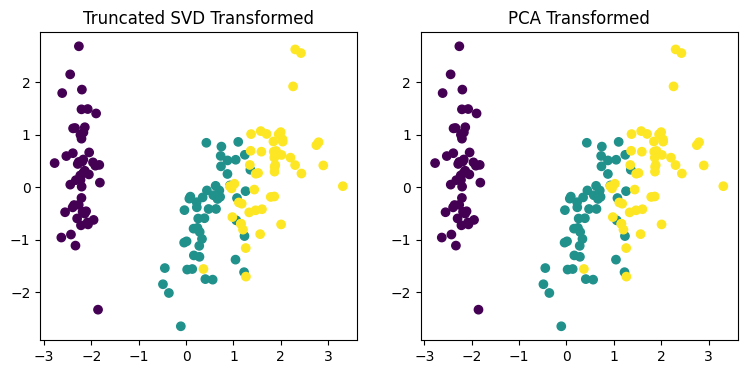

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

# 4. NMF(Non-Negative Matric Factorization)



4-1 ) NMF 와 관련된 설명중에 옳지 않은 것을 고르고 올바르게 고치시오.


1.   NMF 는 Truncated SVD 와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형이다.

2.   4X6 원본 행렬 V는 4X2 행렬 W와 2X6 행렬 H로 근사해 분해할 수 있는데 분해 행렬 W는 원본 열에 대해서 이 잠재 요소의 값이 얼마나 되는지 대응하고, 분해 행렬 H는 이 잠재 요소가 원본 행으로 어떻게 구성되는지 나타내는 행렬이다.

3. NMF는 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 테스트의 토픽 도출 등의 영역에서 상요되고 있다.

답) 2. 4X6 원본 행렬 V는 4X2 행렬 W와 2X6 행렬 H로 근사해 분해할 수 있는데 분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지 대응하고, 분해 행렬 H는 이 잠재 요소가 원본 열으로 어떻게 구성되는지 나타내는 행렬이다.

4-2) 붗꽃 데이터를 NMF를 이용해 2개의 컴포넌트로 변환하고 이를 시각화 하는 코드입니다.

아래의 코드이 빈칸을 채우고 실행해보세요.

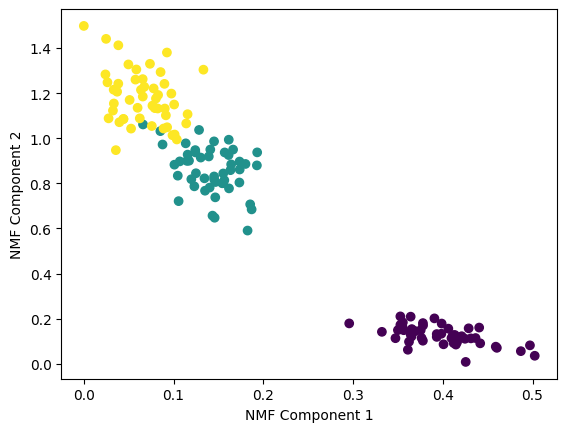

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

plt.show()
